In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as ts
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
import os
os.getcwd()

'C:\\Users\\Gabriel\\Desktop\\analise_de_dados\\Series Temporais'

In [3]:
data = pd.read_excel ('teste.xls')
data['Var1'] = data['Var1'].apply(lambda x: round(x, 4))
data.head()

,Var1
0,100.0194
1,103.9771
2,100.5608
3,99.4196
4,99.8989


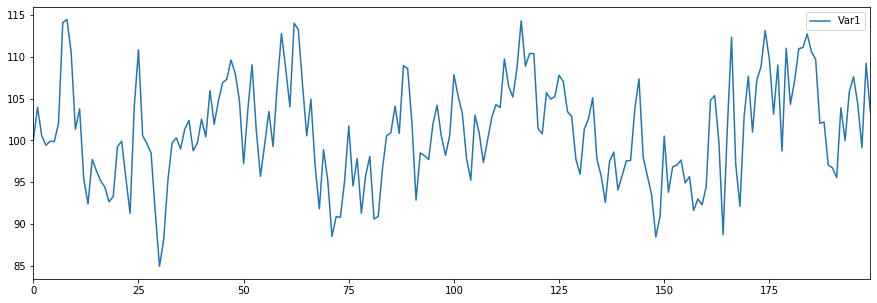

In [4]:
data.plot(figsize=(15,5))

In [5]:
ACF, q, pq = ts.acf(data['Var1'], qstat=True, fft = False)

In [6]:
tabela = np.c_[range(1,41), ACF[1:], q, pq]
tabela = pd.DataFrame(tabela, columns=['lag', "AC", "Q", "Prob(>Q)"])

In [7]:
tabela.head()

,lag,AC,Q,Prob(>Q)
0,1.0,0.648355,85.340220,2.512013e-20
1,2.0,0.396029,117.341655,3.308137e-26
2,3.0,0.360594,144.007260,5.168184e-31
3,4.0,0.306134,163.324594,2.830236e-34
4,5.0,0.156588,168.404566,1.597629e-34


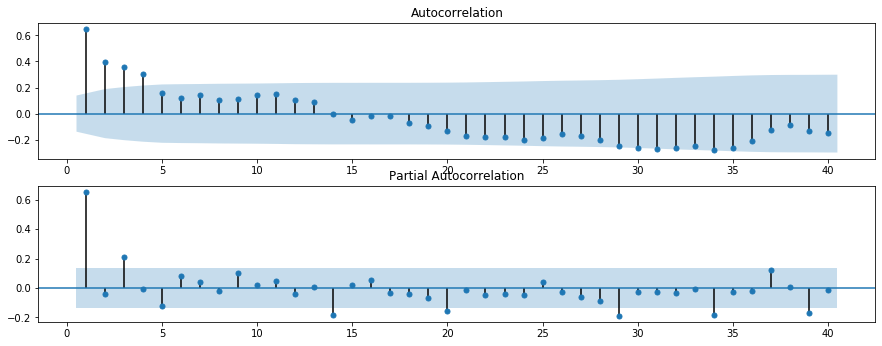

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,5.5))
fig = plot_acf(data['Var1'], lags=40, zero=False, ax=ax1)

fig = plot_pacf(data['Var1'], lags=40, zero=False, ax=ax2)


In [9]:
ma1 = sm.tsa.ARMA(data, (0,1))
ma1 = ma1.fit()

In [10]:
ma1.params

const         101.100364
ma.L1.Var1      0.593881
dtype: float64

In [11]:
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Var1   No. Observations:                  200
Model:                     ARMA(0, 1)   Log Likelihood                -602.782
Method:                       css-mle   S.D. of innovations              4.923
Date:                Mon, 10 Feb 2020   AIC                           1211.565
Time:                        00:27:15   BIC                           1221.460
Sample:                             0   HQIC                          1215.569
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.1004      0.554    182.554      0.000     100.015     102.186
ma.L1.Var1     0.5939      0.048     12.256      0.000       0.499       0.689
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.6838           +0.0000j            1.6838            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
residuo = ma1.resid
residouquad = residuo**2
estimado = ma1.predict()

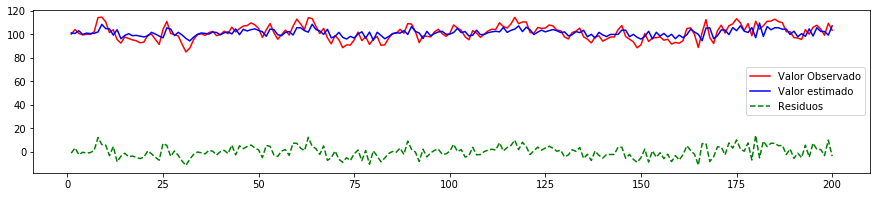

In [13]:
x = range(1,len(data)+1)
fig, axes  =  plt.subplots(figsize = (15, 3))
axes.plot(x, data['Var1'], 'r', label = 'Valor Observado') 
axes.plot(x, estimado, 'b',  label = 'Valor estimado')
axes.plot(x, residuo, 'g--', label = 'Residuos')
axes.legend()

In [17]:
ACF, q, pq = ts.acf(residuo, qstat=True, fft = False)
tabela = np.c_[range(1,41), ACF[1:], q, pq]
tabela = pd.DataFrame(tabela, columns=['lag', "ACF", "Q", "Prob(>Q)"])
tabela

,lag,ACF,Q,Prob(>Q)
0,1.0,0.173472,6.109215,1.344788e-02
1,2.0,0.304200,24.990677,3.744066e-06
2,3.0,0.166361,30.666360,9.992682e-07
3,4.0,0.264269,45.061609,3.860404e-09
4,5.0,0.032216,45.276640,1.274614e-08
5,6.0,0.068700,46.259506,2.628433e-08
6,7.0,0.126734,49.621610,1.713831e-08
7,8.0,0.025065,49.753808,4.556956e-08
8,9.0,0.095152,51.668867,5.221049e-08
9,10.0,0.053378,52.274703,1.014973e-07


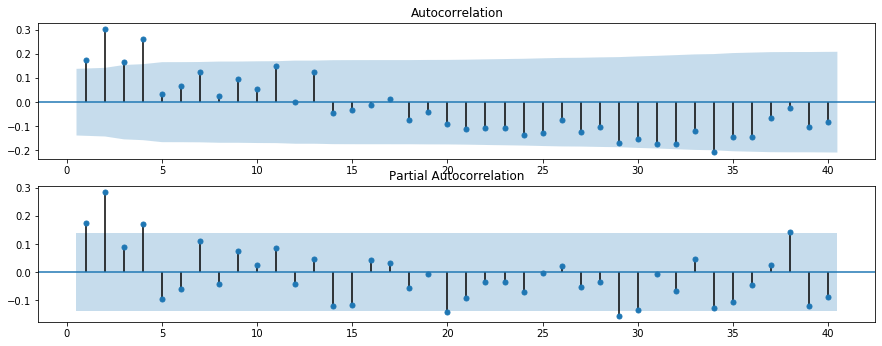

In [15]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,5.5))

fig = plot_acf(residuo, lags=40, zero=False, ax=ax1)
fig = plot_pacf(residuo, lags=40, zero=False, ax=ax2)